In [1]:
# Import dependencies.
from citipy import citipy
import numpy as np
import pandas as pd
import random
import requests as req
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Import Open Weather Map API keys.
from openWeatherMapApiKeys import apiKey


In [2]:
# Declare variables describing the scope of lat/lng search for cities.
latDim = {'min': -55, 'max': 65}
lngDim = {'min': -180, 'max': 180}

latVals = np.arange(latDim['min'], latDim['max'], 0.1)
lngVals = np.arange(lngDim['min'], lngDim['max'], 0.1)

In [3]:
# Create an empty data frame that will contain details of our randomly selected cities.
cities = 0

colNames = ('cityName', 'countryCode', 'randLat', 'randLng', 'uniqueName', 'Latitude', 'Longitude','Temperature',
            'Humidity','Cloudiness','WindSpeed')
cities = pd.DataFrame(columns = colNames)
cities

,cityName,countryCode,randLat,randLng,uniqueName,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed


In [10]:
# Query Citipy for random lat long values until we collect our sample.

sampleSize = 500

baseUrl = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

while len(cities) <= sampleSize:
    randLat = random.choice(latVals)
    randLng = random.choice(lngVals)
    city = citipy.nearest_city(randLat, randLng)
    cityName = city.city_name
    countryCode = city.country_code
    if cityName + countryCode in cities.uniqueName.tolist():
        pass
    else:
        url = baseUrl + cityName + ',' + countryCode + '&units=' + units + '&APPID=' + apiKey
        weather_response = req.get(url)
        weather_json = weather_response.json()
        print('Status code: ' + str(weather_json["cod"]) + ' DF Length: ' + str(len(cities)))
        if weather_json["cod"] == 200:
            Latitude = weather_json["coord"]["lat"]
            Longitude = weather_json["coord"]["lon"]
            Temperature = weather_json["main"]["temp"]
            Humidity = weather_json["main"]["humidity"]
            Cloudiness = weather_json["clouds"]["all"]
            WindSpeed = weather_json["wind"]["speed"]
            cities.loc[len(cities)+1] = [cityName, countryCode, randLat, randLng, cityName, Latitude, Longitude, Temperature, Humidity, Cloudiness, WindSpeed]
#             cities = concat(cities, DataFrame([{'cityName': cityName, 'countryCode' : countryCode, 'randLat' : randLat,'randLng' : randLng, 'uniqueName' : cityName, 'Latitude' : Latitude, 'Longitude' : Longitude,'Temperature' : Temperature, 'Humidity' : Humidity,'Cloudiness' : Cloudiness,'WindSpeed' : WindSpeed}])
        else:
            pass


Status code: 200 DF Length: 500


In [5]:
cities

,cityName,countryCode,randLat,randLng,uniqueName,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
1,carnarvon,au,-24.1,116.6,carnarvon,-24.87,113.63,66.12,86.0,92.0,15.95
2,jamestown,sh,-32.0,-10.9,jamestown,-15.94,-5.72,67.20,100.0,88.0,15.84
3,yulara,au,-24.4,130.0,yulara,-25.24,130.99,71.60,28.0,75.0,8.05
4,atuona,pf,-9.8,-139.5,atuona,-9.80,-139.03,79.89,100.0,92.0,16.84
5,saleaula,ws,-6.0,-170.3,saleaula,31.50,75.75,84.66,88.0,8.0,4.43
6,kapaa,us,34.0,-168.1,kapaa,22.08,-159.32,86.49,74.0,75.0,13.87
7,kavieng,pg,8.2,155.7,kavieng,-2.57,150.80,78.99,100.0,88.0,7.23
8,zubtsov,ru,55.9,34.8,zubtsov,56.18,34.59,61.26,84.0,92.0,3.65
9,mataura,pf,-50.1,-147.6,mataura,5.95,80.55,77.91,100.0,88.0,5.66
10,tual,id,-7.2,129.4,tual,-5.67,132.75,80.07,99.0,0.0,16.51


In [6]:
print(cities.head())

    cityName countryCode  randLat  randLng uniqueName  Latitude  Longitude  \
1  carnarvon          au    -24.1    116.6  carnarvon    -24.87     113.63   
2  jamestown          sh    -32.0    -10.9  jamestown    -15.94      -5.72   
3     yulara          au    -24.4    130.0     yulara    -25.24     130.99   
4     atuona          pf     -9.8   -139.5     atuona     -9.80    -139.03   
5   saleaula          ws     -6.0   -170.3   saleaula     31.50      75.75   

   Temperature  Humidity  Cloudiness  WindSpeed  
1        66.12      86.0        92.0      15.95  
2        67.20     100.0        88.0      15.84  
3        71.60      28.0        75.0       8.05  
4        79.89     100.0        92.0      16.84  
5        84.66      88.0         8.0       4.43  


In [7]:
len(cities)

500

In [8]:
sorted = cities.sort(['Latitude'], ascending=[0]).reset_index()
sorted

/Users/jakram/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,cityName,countryCode,randLat,randLng,uniqueName,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,189,krasnoselkup,ru,64.4,82.6,krasnoselkup,65.70,82.47,51.72,92.0,0.0,7.34
1,307,tasiilaq,gl,53.5,-32.2,tasiilaq,65.61,-37.64,44.60,87.0,92.0,5.82
2,431,tasiilaq,gl,59.4,-32.6,tasiilaq,65.61,-37.64,44.60,87.0,92.0,5.82
3,319,maniitsoq,gl,63.4,-56.9,maniitsoq,65.42,-52.90,39.39,97.0,0.0,5.10
4,92,olafsvik,is,60.2,-29.9,olafsvik,64.89,-23.71,50.46,100.0,0.0,10.92
5,67,olafsvik,is,60.2,-26.7,olafsvik,64.89,-23.71,50.46,100.0,0.0,10.92
6,85,provideniya,ru,47.1,-172.8,provideniya,64.38,-173.30,46.40,75.0,90.0,13.42
7,471,provideniya,ru,62.6,-172.5,provideniya,64.38,-173.30,46.40,75.0,90.0,13.42
8,340,provideniya,ru,60.0,-172.7,provideniya,64.38,-173.30,46.40,75.0,90.0,13.42
9,248,grindavik,is,60.5,-26.0,grindavik,63.84,-22.43,46.04,93.0,0.0,5.82


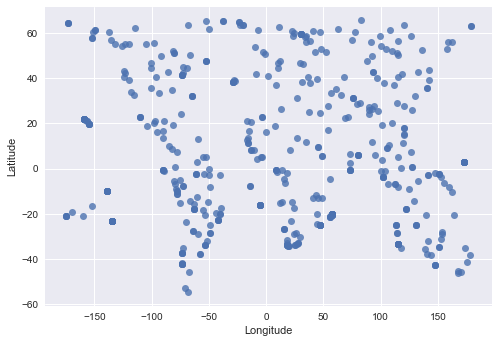

In [17]:
p = sns.regplot(x="Longitude", y="Latitude", data=sorted, fit_reg=False)
plt.show()

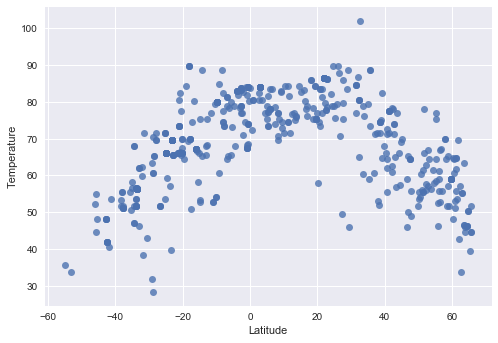

In [16]:
p = sns.regplot(x="Latitude", y="Temperature", data=sorted, fit_reg=False)
plt.show()

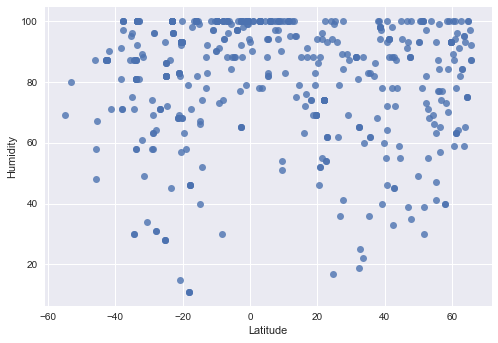

In [15]:
p = sns.regplot(x="Latitude", y="Humidity", data=sorted, fit_reg=False)
plt.show()

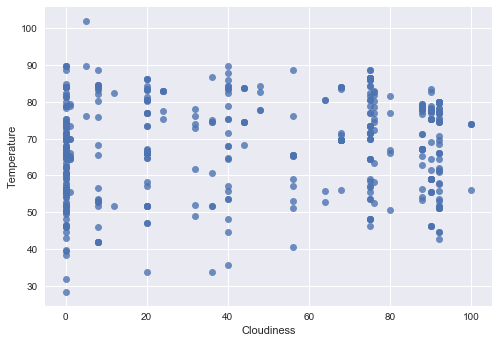

In [18]:
p = sns.regplot(x="Cloudiness", y="Temperature", data=sorted, fit_reg=False)
plt.show()